Realizamos las importaciónes correspondientes
cargamos el dataset, seleccionamos columnas relevantes y limpiamos.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression     
import matplotlib.pyplot as plt                     

data = pd.read_csv('./train_.csv')

data = data[['GrLivArea', 'SalePrice']].dropna()

print(f"Número de filas después de limpieza: {len(data)}")
print(data.head())

Número de filas después de limpieza: 1460
   GrLivArea  SalePrice
0       1710     208500
1       1262     181500
2       1786     223500
3       1717     140000
4       2198     250000


3. Cree y entrene un modelo de regresión lineal con la librería Scikit Learn.

Preparamos las variables, dividimos en conjunto de entremiento y prueba (80% train, 20% test). Creamos y entrenamos el modelo, por ultimo se impremen los coeficientes del modelo.

In [ ]:

X = data[['GrLivArea']]  
y = data['SalePrice']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Pendiente (coeficiente): {model.coef_[0]:.2f}")
print(f"Intersección: {model.intercept_:.2f}")
print(f"Precisión del modelo (R^2) en entrenamiento: {model.score(X_train, y_train):.2f}")

Pendiente (coeficiente): 102.49
Intersección: 24899.75
Precisión del modelo (R^2) en entrenamiento: 0.48



4. Realice predicciones con el modelo.

Realizamos las predicciones en el conjunto de prueba, mostramos algunas predicciones junto con valores reales,por ultimos evaluamos el rendimeinto del modelo en conjunto de prueba

In [ ]:

y_pred = model.predict(X_test)

predictions = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
print("Comparación de algunos valores reales vs predichos:")
print(predictions.head(10))  


from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"\nR^2 en el conjunto de prueba: {r2:.2f}")
print(f"Error cuadrático medio (MSE): {mse:.2f}")

Comparación de algunos valores reales vs predichos:
        Real       Predicho
892   154500  134357.956280
1105  325000  293625.798437
413   115000  130258.397924
522   159000  195441.375795
1036  315500  190931.861602
614    75500   89467.792275
218   311500  225163.173881
1160  146000  174123.672340
649    84500   89467.792275
887   135500  167666.867928

R^2 en el conjunto de prueba: 0.55
Error cuadrático medio (MSE): 3418946311.18


5. Cree un gráfico de visualización con Matplotlib que compare los datos de entrenamiento con los resultados predecidos.

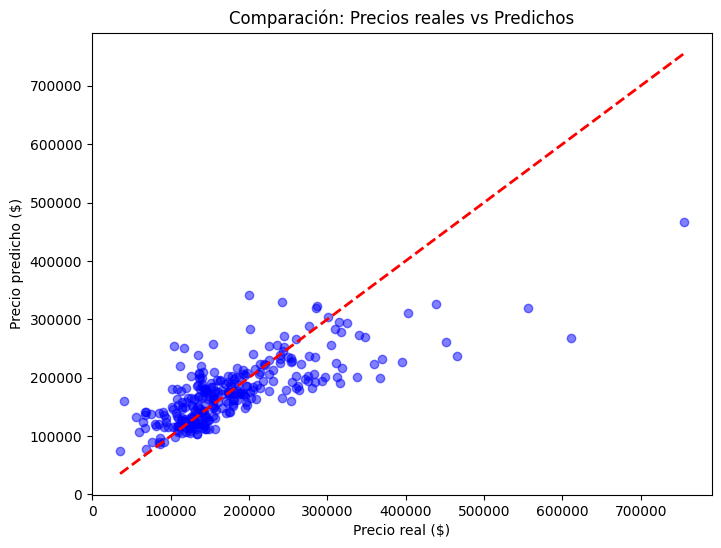

In [ ]:

plt.figure(figsize=(8, 6))  
plt.scatter(y_test, y_pred, color='blue', alpha=0.5) 


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)


plt.xlabel('Precio real ($)')
plt.ylabel('Precio predicho ($)')
plt.title('Comparación: Precios reales vs Predichos')


plt.show()